# Evaluating new pathway analysis method on Benchmark
This is a tutorial for evaluating a new pathway analysis method. We constructed the benchmark using 3 types of assays, where all raw data were curated from [ENCODE](https://www.encodeproject.org/). The following will explain how to evaluate your method with different assays.

## Evaluating methods on shRNA knockdown followed by RNA-seq

This is the major component for constructing the Benchmark. Raw read count from [K562](https://github.com/hedgehug/PET/blob/main/data/ENCODE_K562_RNA_seq_raw_count.zip) and [HepG2](https://github.com/hedgehug/PET/blob/main/data/ENCODE_HepG2_RNA_seq_raw_count.zip) were formatted into single data matrix with samples bearing shRNA knockdown and the corresponding control samples. Additionally, as ground truth pathways, we extracted the top 200 up and down-regulated DEGs (differentially expressed genes) after knockdown from ENCODE processed data. For example, [ENCODE_HepG2_RNA_up.gmt]() contains the top 200 up-regulated DEGs after each knockdown in HepG2 cell line, sorted by DESeq2 p-value. All the targets that's been knockdowned in two cell lines are matched. 

To evaluate new method on the RNA-seq, please run your method with the data matrix from one cell line against the pathway file (.gmt) from the other cell line, e.g. use [K562 raw read count](https://github.com/hedgehug/PET/blob/main/data/ENCODE_K562_RNA_seq_raw_count.zip) as input data matrix and [ENCODE_HepG2_RNA_down.gmt]() as target pathway. 

**Intuition**: in this realistic setting, we would expect to identify HepG2 G as No.1 pathway among all HepG2 pathways, when K562 G is the input data matrix, where G is a knockdown target in the expeirments.

We provided the evaluation results from top performing pathway analysis methods under optimal setting with expression data from [HepG2](https://github.com/hedgehug/PET/blob/main/data/ENCODE_HepG2_RNA_seq_raw_count.zip) and pathway file as [ENCODE_K562_RNA_down.gmt](https://github.com/hedgehug/PET/blob/main/data/ENCODE_K562_RNA_down.gmt).

Here we provide a toy example showing how the evaluation work.

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import random 
import matplotlib.pyplot as plt

random.seed(42)

all_target = np.loadtxt('data/ENCODE_HepG2_RNA_down.gmt', dtype=str, delimiter='\t')[:, 0]

# a random matrix to represent the enrichment score value of the new results.
rand_enrichment_score_mat = np.random.rand(len(all_target), len(all_target))
enrichment_score_df = pd.DataFrame(rand_enrichment_score_mat, index=all_target, columns=all_target)

# here, we suppose each column is an input matrix
# e.g. first column is HepG2 SNRNP200 data matrix and each tow represents a pathway from K562 KO DEGs
enrichment_score_df

,SNRNP200,DNAJC2,FXR1,HLTF,SART3,APOBEC3C,AKAP1,NPM1,PCBP2,PA2G4,...,AKAP8,DDX55,GPKOW,METAP2,HNRNPM,SUPV3L1,SMNDC1,SUB1,PRPF8,TAF15
SNRNP200,0.602673,0.289099,0.953966,0.931258,0.110257,0.216217,0.150295,0.680895,0.794098,0.440099,...,0.844901,0.802319,0.962008,0.600302,0.286001,0.773700,0.299138,0.035654,0.074168,0.820527
DNAJC2,0.129946,0.843615,0.240619,0.412677,0.738620,0.284218,0.687444,0.622427,0.207435,0.639187,...,0.897472,0.295152,0.183293,0.582664,0.356914,0.290465,0.450036,0.062087,0.252223,0.895044
FXR1,0.514017,0.044483,0.830414,0.771790,0.236640,0.968020,0.827885,0.543690,0.379981,0.878606,...,0.602269,0.336939,0.358076,0.841964,0.351280,0.178956,0.431698,0.212226,0.022039,0.040064
HLTF,0.067819,0.849995,0.504777,0.161719,0.265548,0.116587,0.343507,0.047914,0.144290,0.686214,...,0.254974,0.008033,0.930125,0.137760,0.752719,0.177862,0.225050,0.023458,0.900203,0.398628
SART3,0.525955,0.422145,0.082678,0.369352,0.805767,0.622977,0.555040,0.766684,0.484802,0.395479,...,0.017200,0.656527,0.024600,0.818185,0.517388,0.505483,0.630859,0.724781,0.066205,0.779025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SUPV3L1,0.690388,0.366269,0.000482,0.827493,0.478367,0.880846,0.610659,0.888205,0.777147,0.890396,...,0.203922,0.228347,0.425355,0.451443,0.745276,0.769855,0.503907,0.324936,0.947782,0.955639
SMNDC1,0.191605,0.943116,0.340946,0.056800,0.254825,0.104938,0.965442,0.306187,0.641728,0.588300,...,0.814382,0.788798,0.429391,0.558836,0.528771,0.170629,0.962859,0.396616,0.918189,0.873644
SUB1,0.946354,0.791423,0.442206,0.965069,0.580498,0.635633,0.183074,0.135521,0.824994,0.820693,...,0.325603,0.915163,0.985954,0.995880,0.767346,0.590802,0.061418,0.923106,0.674899,0.013856
PRPF8,0.609946,0.193129,0.696337,0.038669,0.201770,0.591689,0.663011,0.475584,0.622853,0.516289,...,0.592245,0.035104,0.400155,0.872122,0.145358,0.879103,0.303150,0.166621,0.554272,0.601915


In [3]:
# calculate the rank for each score matrix, calculate the rank of the corresponding pathway in each row
# let the rank starts from 1
rank_list = []
for target in all_target:
    pathway_scores = enrichment_score_df[target]
    rank_list.append(np.where(pathway_scores.sort_values(ascending=False).index==target)[0][0]+1)    

In [4]:
# load the benchmark result for top performing methods evaluated by Benchmark
# the file contains the rank for expected pathways by each method
benchmark_result = pd.read_csv('data/Benchmark_results_RNA_seq.txt', header=0, delimiter='\t')
benchmark_result

,PET,ORA,Enrichr,GSEA optimized,PIANO,Decoupler,Enrichment browser,EGSEA
0,1,3,8,3,1.0,39,3,11
1,1,2,26,6,4.0,19,1,1
2,6,47,9,13,10.0,118,1,5
3,1,1,28,1,1.0,44,2,1
4,1,1,2,1,6.0,32,11,15
...,...,...,...,...,...,...,...,...
192,1,13,2,2,NaN,58,3,1
193,2,6,10,20,NaN,17,18,4
194,1,1,16,1,NaN,10,49,3
195,6,26,10,19,NaN,30,13,31


<Axes: ylabel='Expected pathway rank'>

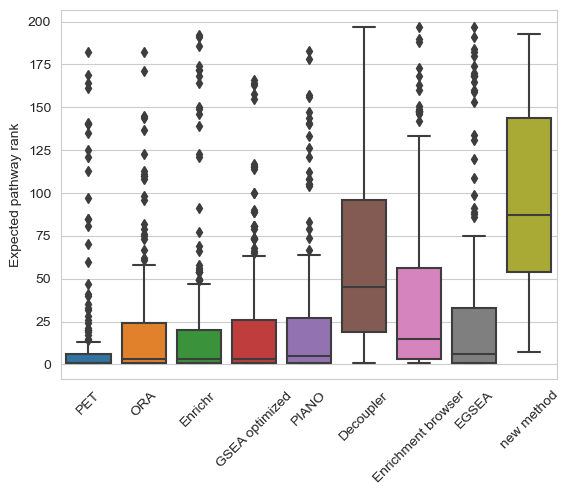

In [8]:
# add the new method result
benchmark_result['new method'] = rank_list

# plot the comparison
plt.xticks(rotation=45)
plt.ylabel('Expected pathway rank')
sns.boxplot(data=benchmark_result)

## Evaluating methods using eCLIP-seq
For eCLIP-seq, we curated the processed file, peak file in bed format, from ENCODE for both HepG2 and K562 cell lines. We annotated the peaks using [HOMER](http://homer.ucsd.edu/homer/ngs/annotation.html) to hg38. The raw and processed data is stored in [Figshare](https://figshare.com/projects/PET_benchmark/161938). Pathway files are provided in [data]((https://github.com/hedgehug/PET/blob/main/data/).

The eCLIP-seq peaks can be used as a ranked gene list with either signal value or p-value in peak files as gene weights. We generated the pathway files based on sorting either signal value or p-value and preserve the top 200 genes with the strongest signal value or most significant p-value.

The evaluation process is similar to RNA-seq. Where user could use the peak information from one cell line and target pathway from another cell line.

<Axes: >

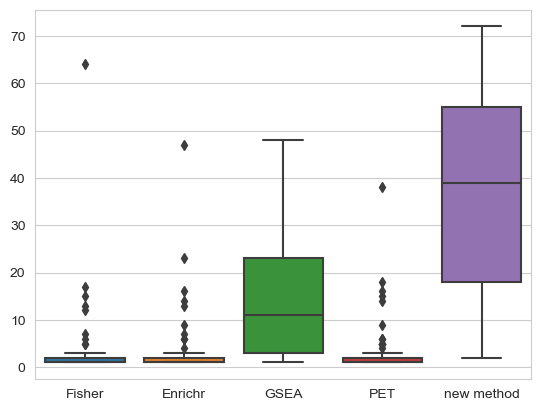

In [9]:
# here, we use the pval gmt as an example, similar evaluation could be done with signal gmt and result
all_target = np.loadtxt('data/ENCODE_HepG2_eCLIP_pval.gmt', dtype=str, delimiter='\t')[:, 0]

# genrate a random matrix to represent the enrichment score/rank/any value of the new results.
rand_enrichment_score_mat = np.random.rand(len(all_target), len(all_target))
enrichment_score_df = pd.DataFrame(rand_enrichment_score_mat, index=all_target, columns=all_target)

# calculate the rank for each input matrix, calculate the rank of the correspoding pathway in each row
# let the rank starts from 1
rank_list = []
for target in all_target:
    pathway_scores = enrichment_score_df[target]
    # for pvalue, the smaller, the more significant
    rank_list.append(np.where(pathway_scores.sort_values(ascending=True).index==target)[0][0]+1)    

# now load the benchmark result for Fisher exact test, Enrichr, GSEA and PET under best settings
# this contains the rank of expected pathway for these 3 methods
benchmark_result = pd.read_csv('data/Benchmark_results_eCLIP_seq_pval.txt', header=0, delimiter='\t')

# add the new method result
benchmark_result['new method'] = rank_list

# plot the comparison
sns.boxplot(data=benchmark_result)

## Evaluating methods using ChIP-seq
For ChIP-seq, we curated the processed file, peak file in bed format, from ENCODE for several cell lines. We annotated the peaks using [HOMER](http://homer.ucsd.edu/homer/ngs/annotation.html) to hg38. The raw and processed data is stored in [Figshare](https://figshare.com/projects/PET_benchmark/161938). Pathway files are provided in [data]((https://github.com/hedgehug/PET/blob/main/data/).

The ChIP-seq can be treated as a ranked gene list with either peak score or q-value with peak file as the weights. We generated the pathway files based on sorting either peak score or q-value and preserve the genes with the strongest signal.

Due to the imbalance of target number among different cell lines, for ChIP-seq evaluation, user could use **all the peak files** and run against **all target pathways**. If a target is present in multiple pathways, then the one with highest rank, based on method's criteria, should be taken into consideration.

In [10]:
# here, we use the qvalue gmt as an example, similar evaluation could be done with signal gmt and result
all_target = np.loadtxt('data/ENCODE_ChIP_seq_qvalue.gmt', dtype=str, delimiter='\t')[:, 0]

# genrate a random matrix to represent the enrichment score/rank/any value of the new results.
rand_enrichment_score_mat = np.random.rand(len(all_target), len(all_target))
enrichment_score_df = pd.DataFrame(rand_enrichment_score_mat, index=all_target, columns=all_target)
enrichment_score_df

,A549-CBX2,A549-CEBPB,A549-CTCF,A549-ELK1,A549-ESRRA,A549-JUN,A549-MAFK,A549-MAZ,A549-MYC,A549-NFE2L2,...,MEL-RCOR1,MEL-SIN3A,MEL-SMC3,MEL-TBP,MEL-TCF12,MEL-USF1,MEL-USF2,MEL-ZKSCAN1,MEL-ZMIZ1,MEL-ZNF384
A549-CBX2,0.291949,0.686005,0.903817,0.219500,0.207152,0.663692,0.863837,0.948058,0.618928,0.805994,...,0.284229,0.272552,0.400883,0.882311,0.296364,0.981370,0.559604,0.252216,0.832143,0.017013
A549-CEBPB,0.314862,0.144225,0.409309,0.192968,0.967211,0.435674,0.134424,0.537781,0.758888,0.828951,...,0.974517,0.835232,0.115837,0.997399,0.025164,0.495609,0.569783,0.642950,0.175822,0.596403
A549-CTCF,0.044289,0.772694,0.701206,0.376529,0.035535,0.360130,0.765743,0.267715,0.410029,0.897283,...,0.177581,0.033302,0.859001,0.427986,0.924393,0.906599,0.545003,0.764306,0.230597,0.624896
A549-ELK1,0.407696,0.216864,0.908634,0.561626,0.204997,0.357087,0.886977,0.519917,0.434959,0.831369,...,0.635662,0.817534,0.977205,0.637981,0.750321,0.459150,0.630308,0.749988,0.176334,0.775708
A549-ESRRA,0.740196,0.830894,0.807709,0.819379,0.300771,0.852311,0.006004,0.746656,0.528616,0.020014,...,0.709146,0.207856,0.451986,0.455048,0.494310,0.640938,0.419218,0.860686,0.846246,0.099471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MEL-USF1,0.061721,0.522895,0.723413,0.640382,0.121701,0.911973,0.598119,0.103369,0.914009,0.102214,...,0.445060,0.267613,0.194437,0.779245,0.012782,0.113671,0.457409,0.738843,0.014949,0.185961
MEL-USF2,0.954766,0.283901,0.626689,0.986408,0.455650,0.284624,0.060312,0.517362,0.721719,0.591989,...,0.122633,0.570736,0.168205,0.333098,0.234548,0.839755,0.366068,0.800959,0.858486,0.230025
MEL-ZKSCAN1,0.483839,0.712412,0.879884,0.164497,0.207388,0.378665,0.178753,0.257602,0.929540,0.186721,...,0.432561,0.683394,0.998954,0.513013,0.313880,0.408316,0.025955,0.925079,0.583397,0.365925
MEL-ZMIZ1,0.760296,0.646621,0.242023,0.225125,0.747166,0.590399,0.231816,0.456838,0.427464,0.430434,...,0.909049,0.017780,0.833228,0.411312,0.462048,0.268251,0.981640,0.279534,0.731104,0.423464


Note: the name is formatted as **Cell line-Target**.

<Axes: >

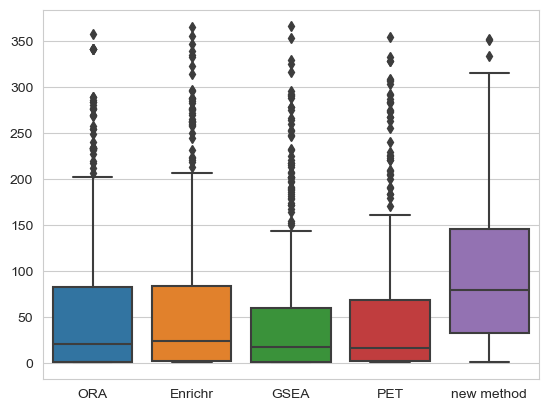

In [11]:
# calculate the rank for each input matrix, calculate the rank of the corresponding pathway in each row
# let the rank starts from 1
rank_list = []
for target in all_target:
    pathway_scores = enrichment_score_df[target]
    # some names might contain two dashes, we only need to keep the exact target name
    tmp_target = target.split('-')[-1]
    # for q-value, the smaller, the better
    sorted_pathways = pathway_scores.sort_values(ascending=True).index
    sorted_pathways = [i.split('-')[-1] for i in sorted_pathways]
    rank_list.append(sorted_pathways.index(tmp_target)+1)

# now load the benchmark result for Fisher exact test, Enrichr, GSEA and PET under best settings
# this contains the rank of expected pathway for these 3 methods
benchmark_result = pd.read_csv('data/Benchmark_results_ChIP_seq_qvalue.txt', header=0, delimiter='\t')

# add the new method result
benchmark_result['new method'] = rank_list

# plot the comparison
sns.boxplot(data=benchmark_result)